<a href="https://colab.research.google.com/github/BrandonLCC/Informe_Tecnico_FMY0100/blob/rama-modelos/Modelo_3_Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importaciones y Dataset**

In [ ]:
#Las importaciones necesarias
import numpy as np
import pandas as pd # Estructura y manipulación de datos
import matplotlib.pyplot as plt # Graficos
from matplotlib import style # Si va
import seaborn as sns # diseño de Graficos

#---- Importaciónes de scikit learn ----

from sklearn.preprocessing import MinMaxScaler  # Con esta importacion, podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1
from sklearn.preprocessing import LabelEncoder # Para transformar datos categoricos a formato numerico

from sklearn.linear_model import LinearRegression # con esta libreria podemos saber sobre problemas de clasificacion, regresion  y clustering () modelo lineal etc
from sklearn.model_selection import train_test_split

#---- Metricas de modelos de regresión ----

from sklearn.metrics import r2_score # solo lo ocuparemos para problemas de regresion o todo lo que sea numerico
from sklearn.metrics import mean_squared_error #solo para la parte numerica, con esto vamos a poder sumar y sacar el promedio del los datos o el error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV




In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022 (1).csv to Anexo ET_demo_round_traces_2022 (1).csv


<ipython-input-5-b92e9cb142f9>:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.Preparacion de los datos**

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

<ipython-input-33-4fe37939733c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
<ipython-input-33-4fe37939733c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
<ipython

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
df_backup

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,2,0,2,511,5,0,0,0,1,1,...,0,0,0,0,5600,27100,4,0,2,2
79153,2,0,2,511,5,0,0,0,0,0,...,1,0,1,0,5500,27100,8,5,1,3
79154,2,0,2,511,5,0,0,0,1,1,...,0,0,0,0,4950,27100,5,0,2,3
79155,2,0,2,511,5,0,0,0,0,2,...,0,0,0,0,4950,27100,1,0,1,0


# **3.Modelo Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Variables independientes y dependiente
X = df_backup[["TeamStartingEquipmentValue"]]
y = df_backup["RoundStartingEquipmentValue"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

,RoundStartingEquipmentValue
0,750
1,800
2,1000
3,850
4,1000
...,...
79152,5600
79153,5500
79154,4950
79155,4950


In [ ]:
modelo = DecisionTreeRegressor(max_depth=3, random_state=42)
modelo.fit(X_train, y_train) # Fit on training data

y_pred = modelo.predict(X_test) # Predict on test data

In [ ]:
print("Datos de prueba:")
print(X_test)
print("las prediciones son:")
predicciones = modelo.predict(X_test)

# Mostrar las predicciones
print("Predicciones:", predicciones)

Datos de prueba:
       TeamStartingEquipmentValue
47581                        1200
55367                       27300
30939                        2000
4231                        20800
58071                       17200
...                           ...
2339                        18700
21463                       26900
21827                       13900
18807                        7800
12567                       27150

[15722 rows x 1 columns]
las prediciones son:
Predicciones: [ 321.7357513  5215.76995263  321.7357513  ... 3660.94447624 1423.89174055
 5215.76995263]


# **Resultado**

In [ ]:
X_test.head()

,TeamStartingEquipmentValue
47581,1200
55367,27300
30939,2000
4231,20800
58071,17200


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)
print("R^2: ",R2)

MSE:  706425.7255703711
MAE:  546.1346045076599
RMSE:  840.4913596048273
R^2:  0.8411526847360986


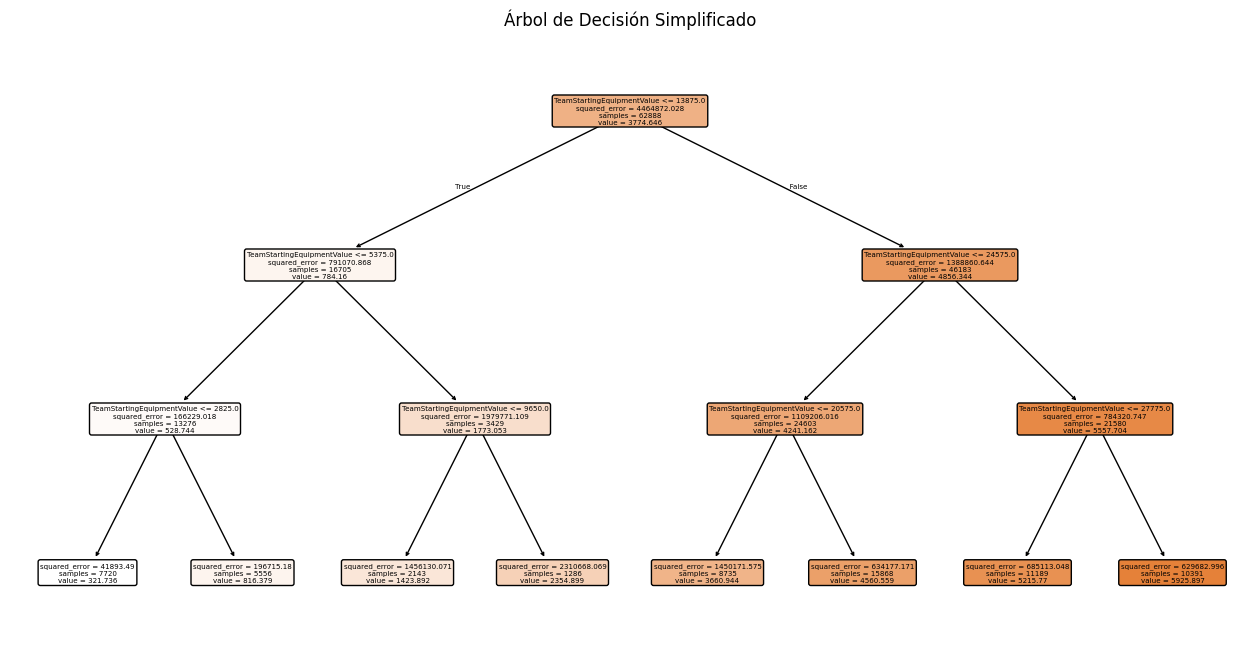

In [ ]:
plt.figure(figsize=(16,8))
plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión Simplificado")
plt.show()


In [ ]:
# Definir la grilla de hiperparámetros incluyendo ccp_alpha
param_grid = {
    'max_depth': [None, 10, 20, 30,50,100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# Modelo base sin restricciones fijas
dt = DecisionTreeRegressor(random_state=42)

# GridSearchCV con scoring negativo del MSE
grid_search = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entrenamiento con validación cruzada
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(" Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluación del modelo en test
best_dt_model = grid_search.best_estimator_
y_pred_best = best_dt_model.predict(X_test)


print("\n Evaluación del mejor modelo:")
print("MSE: ", mean_squared_error(y_test, y_pred_best))
print("MAE: ", mean_absolute_error(y_test, y_pred_best))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("RMSE: ",rmse)
print("R^2: ", r2_score(y_test, y_pred_best))



 Mejores parámetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

 Evaluación del mejor modelo:
MSE:  666172.167666805
MAE:  517.3720546275705
RMSE:  816.1937071962789
R^2:  0.8502041240755123


# **Resultado del Modelo**

MSE:  706425.7255703711

MAE:  546.1346045076599

RMSE:  840.4913596048273

R^2:  0.8411526847360986

**observacion:**


El modelo se podria considerar bueno ya que el R^2 ( 0.84) lo que significa que que es bueno ya que 85% de la variabilidad en los datos

* El MSE es de 706,425.73, que representa el error cuadrático medio. Aunque su escala depende de la variable objetivo, es útil para comparar entre modelos.

* El MAE  muestra que el modelo se equivoca en promedio por  546.13  lo que refleja una buena precision en los terminos absolutos



* El RMSE  es de 840.49 lo que significa que las prediciones se desvian en promedio 840.49 unidades de los valores reales



# **Resultado del gridseachcv**

MSE:  666172.167666805

MAE:  517.3720546275705

RMSE:  816.1937071962789

R^2:  0.8502041240755123

**observacion**

* Los resultado de gridseah cv muestra unos resultados un poco mas mejores
 (R² = 0.85) lo que significa que explica el 85% de variabilidad de los dato,y en  en MSE (666,172), MAE (517) y RMSE (816) bajaron un poco los errores
  de prediciones y desviazion en promedio de los valores reales.


